In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns
import cartopy.crs as ccrs
from tqdm import tqdm
import os
import imageio

In [2]:
drivers = pd.read_csv('/mnt/c/Users/imrit/Downloads/Intermittent_lakes_ALLdrivers_v1.3.csv')
suwa = drivers[drivers['lakecode'] == 'ARAI1']
suwa.replace({'Y': 1, 'N': 0, '-999': 0.5}, inplace=True)
display(suwa.head(), suwa.tail())

/home/arshad/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,lakecode,lake,start_year,end_year,FrozeYN,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,ARAI1,Lake Suwa,1443,1444,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502,NaN
1,ARAI1,Lake Suwa,1444,1445,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.558,NaN
2,ARAI1,Lake Suwa,1445,1446,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.552,NaN
3,ARAI1,Lake Suwa,1446,1447,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.223,NaN
4,ARAI1,Lake Suwa,1447,1448,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446,NaN


,lakecode,lake,start_year,end_year,FrozeYN,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
571,ARAI1,Lake Suwa,2014,2015,0.0,19.833334,11.000000,-2.800000,7.800000,585.30005,...,1.130833,-9.097500,-0.381667,0.353333,0.186667,-0.066667,0.084583,1361.386230,NaN,113.345205
572,ARAI1,Lake Suwa,2015,2016,0.0,19.533335,11.100000,-1.333333,8.066667,624.10000,...,1.634167,-4.162500,-1.174167,1.497500,0.433333,0.629583,0.096833,1361.409790,NaN,69.816438
573,ARAI1,Lake Suwa,2016,2017,0.0,19.900000,11.366667,-1.866667,7.233334,566.60000,...,1.542500,7.918333,-0.456667,0.395833,-0.038333,-0.114250,0.325583,1360.951904,NaN,39.822404
574,ARAI1,Lake Suwa,2017,2018,1.0,19.733334,10.400001,NaN,NaN,603.20000,...,0.517500,-2.460833,0.109167,-0.236667,0.225833,0.256250,0.298833,1360.659668,NaN,21.739726
575,ARAI1,Lake Suwa,2018,2019,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,-15.254167,0.066667,-0.020833,1.083333,0.202917,0.051917,1360.638672,NaN,6.972603


In [3]:
suwa['FrozeYN'].value_counts()

1.0    516
0.0     45
0.5     15
Name: FrozeYN, dtype: int64

In [7]:
suwa_freeze = suwa[suwa['FrozeYN'] == 1]
suwa_no_freeze = suwa[suwa['FrozeYN'] == 0]
suwa_no_freeze['FrozeYN'] = suwa_no_freeze['FrozeYN'].replace(0, 1)
display(suwa_no_freeze.head(), suwa_no_freeze.tail())

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,lakecode,lake,start_year,end_year,FrozeYN,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
103,ARAI1,Lake Suwa,1546,1547,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.638,NaN
112,ARAI1,Lake Suwa,1555,1556,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.367,NaN
228,ARAI1,Lake Suwa,1671,1672,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1360.092041,0.930,NaN
259,ARAI1,Lake Suwa,1702,1703,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1360.095947,1.219,NaN
281,ARAI1,Lake Suwa,1724,1725,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1360.335938,-1.114,NaN


,lakecode,lake,start_year,end_year,FrozeYN,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
570,ARAI1,Lake Suwa,2013,2014,1.0,20.466667,11.500000,-2.666667,7.133333,559.80000,...,-0.517500,9.058333,0.345833,-0.331667,0.210000,0.001000,0.149000,1361.263062,NaN,94.021918
571,ARAI1,Lake Suwa,2014,2015,1.0,19.833334,11.000000,-2.800000,7.800000,585.30005,...,1.130833,-9.097500,-0.381667,0.353333,0.186667,-0.066667,0.084583,1361.386230,NaN,113.345205
572,ARAI1,Lake Suwa,2015,2016,1.0,19.533335,11.100000,-1.333333,8.066667,624.10000,...,1.634167,-4.162500,-1.174167,1.497500,0.433333,0.629583,0.096833,1361.409790,NaN,69.816438
573,ARAI1,Lake Suwa,2016,2017,1.0,19.900000,11.366667,-1.866667,7.233334,566.60000,...,1.542500,7.918333,-0.456667,0.395833,-0.038333,-0.114250,0.325583,1360.951904,NaN,39.822404
575,ARAI1,Lake Suwa,2018,2019,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,-15.254167,0.066667,-0.020833,1.083333,0.202917,0.051917,1360.638672,NaN,6.972603


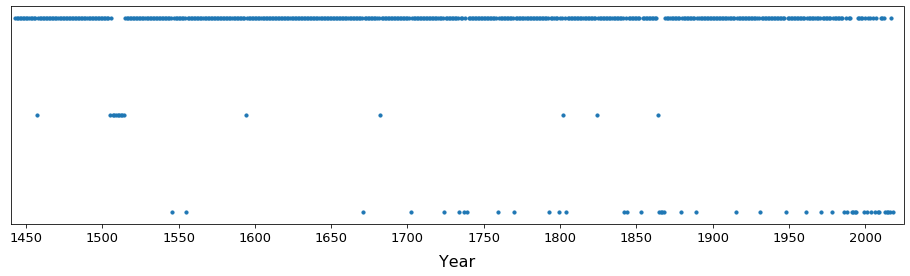

In [5]:
graph.figure(figsize=(16, 4))
graph.scatter(suwa['start_year'], suwa['FrozeYN'], s=10)
graph.xlim(1440, 2025)
graph.yticks([])
graph.xticks([1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000], fontsize=13)
graph.xlabel('Year', fontsize=16, labelpad=10)
graph.show()

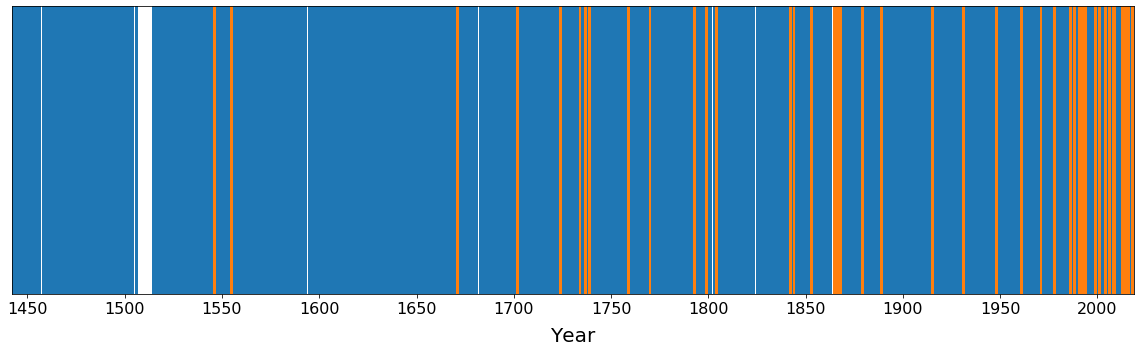

In [6]:
wid = 1.5

graph.figure(figsize=(25, 10))
graph.bar(suwa_freeze['start_year'], suwa_freeze['FrozeYN'], width=wid)
graph.bar(suwa_no_freeze['start_year'], suwa_no_freeze['FrozeYN'], width=wid)
graph.xlim(1442, 2019)
graph.ylim(0, 0.95)
graph.yticks([])
graph.xticks([1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000], fontsize=16)
graph.xlabel('Year', fontsize=20, labelpad=10)
graph.tight_layout()
# graph.savefig('/mnt/c/users/imrit/Downloads/Extreme_events_presentation/suwa_data_freeze_no_freeze.png')
graph.show()

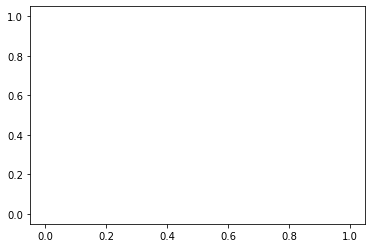

In [17]:
year_subset = [1443]
no_freeze_df = suwa_no_freeze[suwa_no_freeze['start_year'].isin(year_subset)]
graph.bar(no_freeze_df['start_year'], no_freeze_df['FrozeYN'], width=wid)
graph.show()

In [33]:
wid=1.5
years = np.arange(1443, 2019)

year_subset = []

frame_size = [1980,1020]

for year in years:
    graph.figure(figsize=(25, 5))
    year_subset.append(year)
    freeze_df = suwa_freeze[suwa_freeze['start_year'].isin(year_subset)]
    no_freeze_df = suwa_no_freeze[suwa_no_freeze['start_year'].isin(year_subset)]
    graph.bar(freeze_df['start_year'], freeze_df['FrozeYN'], width=wid)
    graph.bar(no_freeze_df['start_year'], no_freeze_df['FrozeYN'], width=wid)
    graph.xlim(1442, 2019)
    graph.ylim(0, 0.95)
    graph.yticks([])
    graph.xticks([1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000], fontsize=16)
    graph.xlabel('Year', fontsize=20, labelpad=10)
    graph.tight_layout()
    graph.savefig(f'/mnt/c/users/imrit/Desktop/GIF_images_suwa/{year}.png', quality=3)
    graph.close()
#     graph.show()

In [35]:
for file in filenames:
    print(file)

1443.png
1444.png
1445.png
1446.png
1447.png
1448.png
1449.png
1450.png
1451.png
1452.png
1453.png
1454.png
1455.png
1456.png
1457.png
1458.png
1459.png
1460.png
1461.png
1462.png
1463.png
1464.png
1465.png
1466.png
1467.png
1468.png
1469.png
1470.png
1471.png
1472.png
1473.png
1474.png
1475.png
1476.png
1477.png
1478.png
1479.png
1480.png
1481.png
1482.png
1483.png
1484.png
1485.png
1486.png
1487.png
1488.png
1489.png
1490.png
1491.png
1492.png
1493.png
1494.png
1495.png
1496.png
1497.png
1498.png
1499.png
1500.png
1501.png
1502.png
1503.png
1504.png
1505.png
1506.png
1507.png
1508.png
1509.png
1510.png
1511.png
1512.png
1513.png
1514.png
1515.png
1516.png
1517.png
1518.png
1519.png
1520.png
1521.png
1522.png
1523.png
1524.png
1525.png
1526.png
1527.png
1528.png
1529.png
1530.png
1531.png
1532.png
1533.png
1534.png
1535.png
1536.png
1537.png
1538.png
1539.png
1540.png
1541.png
1542.png
1543.png
1544.png
1545.png
1546.png
1547.png
1548.png
1549.png
1550.png
1551.png
1552.png
1553.png
1

In [37]:
images = []

filenames = os.listdir('/mnt/c/users/imrit/Desktop/GIF_images_suwa/')

for filename in filenames:
    images.append(imageio.imread(f'/mnt/c/users/imrit/Desktop/GIF_images_suwa/{filename}'))
imageio.mimsave('/mnt/c/users/imrit/Desktop/GIF_images_suwa/suwa_freeze.gif', images)

## Correlation Bar graph

In [3]:
global_proportion_corr = pd.read_csv('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/climate_global_correlations.csv')
display(global_proportion_corr)

,Param,Correlation
0,Spring Temp,0.401181
1,Winter temp,0.395001
2,AMO annual,0.388730
3,NINO3 annual,0.283371
4,NAO winter,0.252829
5,AO annual,0.213210
6,Fall cloud cover,-0.261246
7,Summer cloud cover,-0.432689


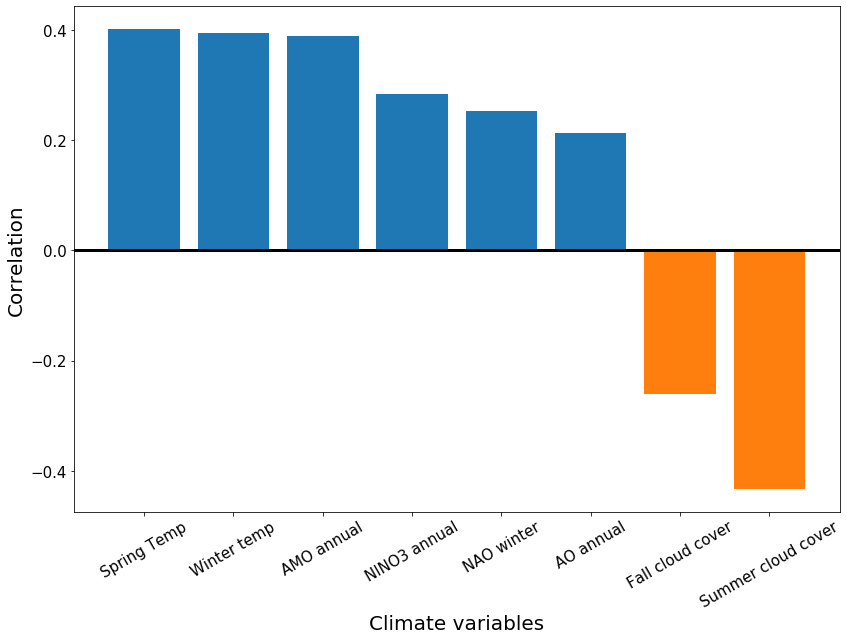

In [29]:
graph.figure(figsize=(12,9))
graph.bar(global_proportion_corr['Param'][:-2], global_proportion_corr['Correlation'][:-2])
graph.bar(global_proportion_corr['Param'][-2:], global_proportion_corr['Correlation'][-2:])
graph.xticks(rotation=30, fontsize=12)
graph.axhline(0, color='black', linewidth=3)
graph.ylabel('Correlation', fontsize=20)
graph.xticks(fontsize=15)
graph.yticks(fontsize=15)
graph.xlabel('Climate variables', fontsize=20)
graph.tight_layout()
# graph.savefig('/mnt/c/users/imrit/Downloads/Extreme_events_presentation/global_climate_correlations.png')
graph.show()

In [34]:
lake_charac_corr = pd.read_csv('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/lake_characteristics_corr_simple.csv')
display(lake_charac_corr)

,Param,Correlation
0,Shoreline length,0.81
1,Volume,0.78
2,Depth,0.75
3,Area,0.72


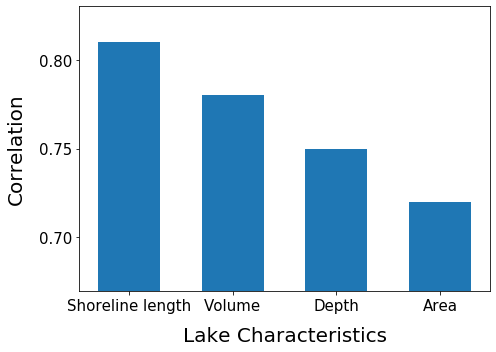

In [54]:
graph.figure(figsize=(7, 5))
graph.bar(lake_charac_corr['Param'], lake_charac_corr['Correlation'], width=0.6)
# graph.xticks(rotation=30, fontsize=12)
graph.ylabel('Correlation', fontsize=20, labelpad=13)
graph.yticks([0.7, 0.75, 0.8], fontsize=15)
graph.yticks(fontsize=15)
graph.ylim(0.67, 0.83)
graph.xlabel('Lake Characteristics', fontsize=20, labelpad=13)
graph.xticks(fontsize=15)
graph.tight_layout()
# graph.savefig('/mnt/c/users/imrit/Downloads/Extreme_events_presentation/global_climate_correlations.png')
graph.show()

# Correlations

In [12]:
global_corr = pd.read_csv('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Results/global_correlations_all_feb_27_2020.csv')
north_american_corr = pd.read_csv('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Results/north_american_correlations_all_feb_27_2020.csv')
european_corr = pd.read_csv('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Results/european_correlations_all_feb_27_2020.csv')

display(global_corr.head(), north_american_corr.head(), european_corr.head())

,attributes,global_proportion
0,proportion,1.000000
1,tmp_DJF,0.774437
2,tmp_lagSON,0.501821
3,tmp_MAM,0.417197
4,NAO mean DJF,0.401236


,attributes,north_american_proportion
0,proportion,1.000000
1,tmp_DJF,0.774886
2,tmp_lagSON,0.455657
3,tmp_MAM,0.314816
4,AMO mean A-DEC,0.300605


,attributes,european_proportion
0,proportion,1.000000
1,tmp_DJF,0.476854
2,AO mean A-DEC,0.399538
3,NAO mean DJF,0.367767
4,AO mean JFM,0.357923


In [20]:
temp_concat_dfs = pd.merge(global_corr, north_american_corr, on='attributes')
concat_dfs = pd.merge(temp_concat_dfs, european_corr, on='attributes')
concat_dfs.drop_duplicates(inplace=True)
display(concat_dfs)
concat_dfs.to_csv('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Results/correlations_merged.csv', index=False)

,attributes,global_proportion,north_american_proportion,european_proportion
0,proportion,1.000000,1.000000,1.000000
1,tmp_DJF,0.774437,0.774886,0.476854
2,tmp_lagSON,0.501821,0.455657,0.287869
3,tmp_MAM,0.417197,0.314816,0.279420
4,NAO mean DJF,0.401236,0.255624,0.367767
...,...,...,...,...
83,SIS_MAM,-0.192183,-0.122628,0.083173
85,SIS_lagSON,-0.248533,0.050559,0.213765
87,cfc_MAM,-0.274588,-0.215916,-0.331480
91,cfc_lagSON,-0.309540,-0.305515,-0.312041


## Kevin's predictions

In [14]:
kevin_folder = '/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Kevin_predictions/'
dfs = []

for file in os.listdir(kevin_folder):
    lake_name = file.split('IceFreePredictions_')[1].split('.')[0]
    df = pd.read_csv(f'{kevin_folder}/{file}')
    dfs.append(df)

data = pd.concat(dfs)
predicted_totals = pd.DataFrame(data.groupby('start_year').sum())
predicted_totals.reset_index(level=0, inplace=True)

rcp_26_columns = [col for col in predicted_totals.columns if '_rcp26' in col]
rcp_60_columns = [col for col in predicted_totals.columns if '_rcp60' in col]

predicted_totals['rcp26_avg'] = predicted_totals[rcp_26_columns].mean(axis=1)*100 / 8
predicted_totals['rcp60_avg'] = predicted_totals[rcp_60_columns].mean(axis=1)*100 / 8

display(predicted_totals)

,start_year,GFDL-ESM2M_rcp26,GFDL-ESM2M_rcp60,GFDL-ESM2M_rcp85,HadGEM2-ES_rcp26,HadGEM2-ES_rcp60,HadGEM2-ES_rcp85,IPSL-CM5A-LR_rcp26,IPSL-CM5A-LR_rcp60,IPSL-CM5A-LR_rcp85,MIROC5_rcp26,MIROC5_rcp60,MIROC5_rcp85,rcp26_avg,rcp60_avg
0,2020,3,3,3,6,2,3,4,1,2,4,1,6,53.125,21.875
1,2021,7,3,3,1,2,7,2,1,1,2,2,5,37.500,25.000
2,2022,2,0,0,1,3,4,1,1,1,5,2,2,28.125,18.750
3,2023,1,3,2,7,7,7,2,3,2,3,2,3,40.625,46.875
4,2024,1,3,4,7,3,3,5,4,6,1,4,1,43.750,43.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2094,3,2,7,8,8,8,7,5,8,6,8,8,75.000,71.875
75,2095,1,7,8,6,7,8,2,7,8,1,7,8,31.250,87.500
76,2096,2,7,8,8,7,8,3,7,8,3,8,8,50.000,90.625
77,2097,1,1,7,7,8,8,7,7,8,6,7,8,65.625,71.875


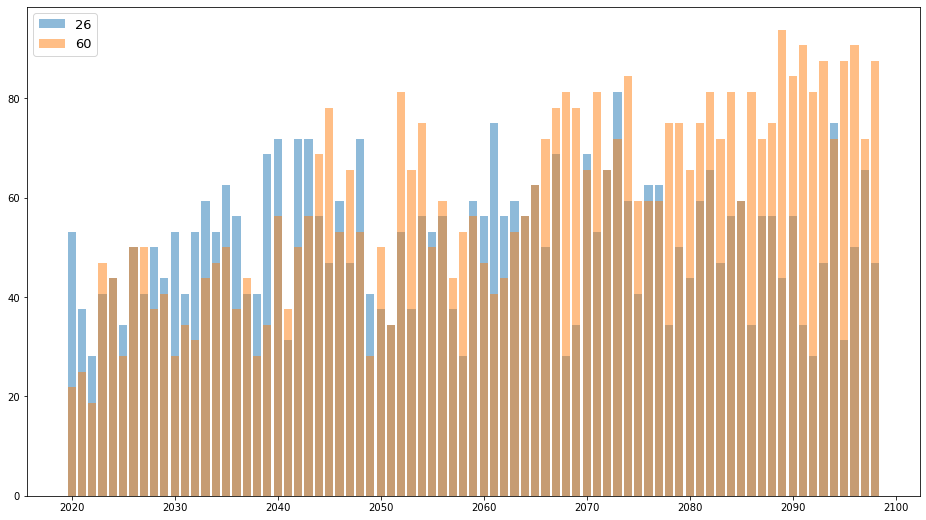

In [15]:
graph.figure(figsize=(16,9))
graph.bar(predicted_totals['start_year'], predicted_totals['rcp26_avg'], label='26', alpha=0.5)
graph.bar(predicted_totals['start_year'], predicted_totals['rcp60_avg'], label='60', alpha=0.5)
graph.legend(fontsize=13)
graph.show()

In [34]:
dfs = []

for file in os.listdir(kevin_folder):
    lake_name = file.split('IceFreePredictions_')[1].split('.')[0]
#     print(lake_name)
    df = pd.read_csv(f'{kevin_folder}/{file}')
    dfs.append(df)

df1 = dfs[0]
year_col = df1['start_year']
columns = [col for col in df1.columns if col != 'start_year']

df_summed = pd.DataFrame(np.zeros(shape=df1[columns].shape), columns=columns, index=df1.index)

for df_i in dfs:
    df_summed[columns] += df_i[columns]

df_summed['start_year'] = year_col
display(df_summed)

,GFDL-ESM2M_rcp26,GFDL-ESM2M_rcp60,HadGEM2-ES_rcp26,HadGEM2-ES_rcp60,IPSL-CM5A-LR_rcp26,IPSL-CM5A-LR_rcp60,MIROC5_rcp26,MIROC5_rcp60,start_year
0,3.0,3.0,6.0,2.0,4.0,1.0,4.0,1.0,2020
1,7.0,3.0,1.0,2.0,2.0,1.0,2.0,2.0,2021
2,2.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2022
3,1.0,3.0,7.0,7.0,2.0,3.0,3.0,2.0,2023
4,1.0,3.0,7.0,3.0,5.0,4.0,1.0,4.0,2024
...,...,...,...,...,...,...,...,...,...
74,3.0,2.0,8.0,8.0,7.0,5.0,6.0,8.0,2094
75,1.0,7.0,6.0,7.0,2.0,7.0,1.0,7.0,2095
76,2.0,7.0,8.0,7.0,3.0,7.0,3.0,8.0,2096
77,1.0,1.0,7.0,8.0,7.0,7.0,6.0,7.0,2097
